In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import re
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


In [2]:
# importar a base
test = pd.read_csv("cars_test.csv", delimiter=';', encoding='latin1')
train = pd.read_csv("cars_train.csv", delimiter=';', encoding='latin1')

In [3]:
# imprimindos as primeiras colunas 
train.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,"3,01E+38",8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,7.473.259.008.373.930
1,"2,80E+38",8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,8.196.533.263.377.470
2,"5,64E+37",16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.282.481.447.192
3,"5,69E+37",14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,12.368.135.885.695.500
4,"3,39E+38",8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,824.197.638.908.304


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_fotos,29407.0,10.323834,3.487334,8.0,8.0,8.0,14.0,21.0
ano_de_fabricacao,29584.0,2016.758552,4.062422,1985.0,2015.0,2018.0,2019.0,2022.0
ano_modelo,29584.0,2017.808985,2.673930,1997.0,2016.0,2018.0,2020.0,2023.0
hodometro,29584.0,58430.592077,32561.769309,100.0,31214.0,57434.0,81953.5,390065.0
num_portas,29584.0,3.940677,0.338360,2.0,4.0,4.0,4.0,4.0
veiculo_alienado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN


In [7]:
car_count_by_brand = train['marca'].value_counts()

In [8]:
print(car_count_by_brand)

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64


In [9]:
# Contagem de valores nulos em cada coluna
null_counts = train.isna().sum()

# Porcentagem de valores nulos em relação ao total de registros
null_percentages = (null_counts / len(train)) * 100

# Combinação das contagens e porcentagens em um DataFrame
null_data = pd.DataFrame({'Total de Valores Nulos': null_counts, 'Porcentagem de Nulos': null_percentages})

# Ordenação dos valores por contagem de nulos em ordem decrescente
sorted_null_data = null_data.sort_values(by='Total de Valores Nulos', ascending=False)

# Exibição dos 10 primeiros resultados
top_10_null_data = sorted_null_data.head(10)

In [10]:
train.garantia_de_fábrica.value_counts()

Garantia de fábrica    4365
Name: garantia_de_fábrica, dtype: int64

In [11]:
# Substitui 'Garantia de fábrica' por 1
# Preenche valores nulos com 0
train.garantia_de_fábrica = train.garantia_de_fábrica.replace('Garantia de fábrica', 1)  
train.garantia_de_fábrica = train.garantia_de_fábrica.fillna(0)

In [12]:
# Remove pontos e converte para tipo float
train['preco'] = train['preco'].str.replace('.', '').astype(float)  

C:\Users\marce\AppData\Local\Temp\ipykernel_15964\1209412936.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['preco'] = train['preco'].str.replace('.', '').astype(float)


# Qual o melhor estado para realizar venda de carro de marca popular ?

In [13]:
# Contagem de ocorrências de cada marca de carro
train.marca.value_counts()  

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64

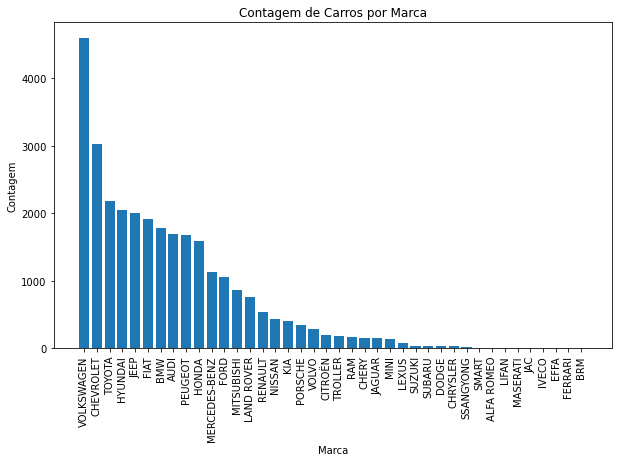

In [14]:
marca_counts = train.marca.value_counts()

plt.figure(figsize=(10, 6))
plt.bar(marca_counts.index, marca_counts.values)
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.title('Contagem de Carros por Marca')
plt.xticks(rotation=90)
plt.show()

In [15]:
marcas = ['VOLKSWAGEN','CHEVROLET','TOYOTA','HYUNDAI','FIAT','PEUGEOT','HONDA','FORD','RENAULT','NISSAN','CITROEN']

In [16]:
# Atribui 1 às instâncias da marca popular
for i in range(0, 11):
    marca = marcas[i]
    train_mask = train.marca == marca
    train['marca'][train_mask] = 1  


C:\Users\marce\AppData\Local\Temp\ipykernel_15964\1425536744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['marca'][train_mask] = 1


In [17]:
# Atribui 0 às instâncias das marcas não populares
marca_nao_popular = train.marca.value_counts().index[1:31]
for marca in marca_nao_popular:
    train_mask = train.marca == marca
    train.loc[train_mask, 'marca'] = 0


In [18]:
# Renomeia a coluna "marca" para "marca_popular"
train.rename({"marca": "marca_popular"}, axis=1, inplace=True) 


In [19]:
# Agrupa e soma a garantia de fábrica e o preço dos carros por estado do vendedor, classificando por garantia de fábrica em ordem decrescente
carros_garantia = train[['garantia_de_fábrica', 'preco', 'estado_vendedor']].groupby('estado_vendedor').sum().sort_values('garantia_de_fábrica', ascending=False)
carros_garantia

,garantia_de_fábrica,preco
estado_vendedor,,
São Paulo (SP),2307.0,1.640546e+20
Rio de Janeiro (RJ),412.0,2.503207e+19
Paraná (PR),389.0,2.624164e+19
Santa Catarina (SC),330.0,2.287032e+19
Rio Grande do Sul (RS),281.0,1.714449e+19
Minas Gerais (MG),264.0,1.734564e+19
Goiás (GO),186.0,7.577309e+18
Alagoas (AL),58.0,1.160240e+18
Bahia (BA),51.0,6.309727e+18


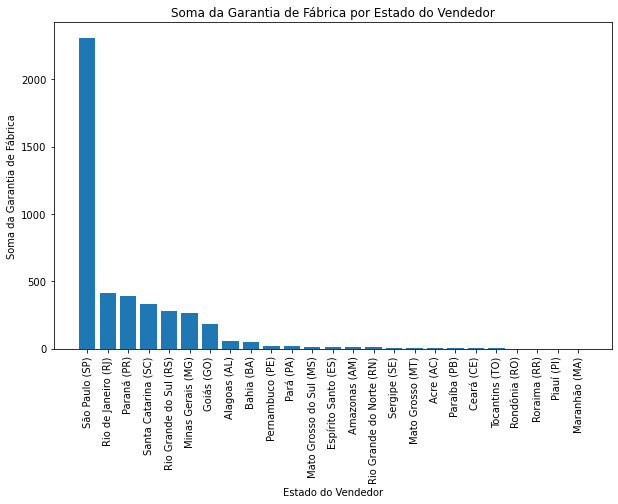

In [20]:
# Criação do gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(carros_garantia.index, carros_garantia['garantia_de_fábrica'])
plt.xlabel('Estado do Vendedor')
plt.ylabel('Soma da Garantia de Fábrica')
plt.title('Soma da Garantia de Fábrica por Estado do Vendedor')
plt.xticks(rotation=90)
plt.show()

# Analise sobre a garantia de fabrica para cada estado vendedor 

A coluna "garantia_de_fábrica" indica o número de carros com garantia de fábrica para cada estado_vendedor.

São Paulo (SP) tem o maior número de carros com garantia de fábrica, com 2307 carros.
Rio de Janeiro (RJ) e Paraná (PR) vêm em seguida, com 412 e 389 carros com garantia de fábrica, respectivamente.
Por outro lado, Maranhão (MA), Piauí (PI), Rondônia (RO) e Roraima (RR) não possuem carros com garantia de fábrica registrados nos dados.
A coluna "preco" indica o valor médio dos carros para cada estado_vendedor.

São Paulo (SP) também lidera nesse aspecto, com um preço médio estimado de 1,64x10^20.
Rio de Janeiro (RJ) e Paraná (PR) têm os segundos maiores preços médios, em torno de 2,50x10^19.

Esses dados mostram a variação na disponibilidade de carros com garantia de fábrica e nos preços médios entre os estados_vendedores analisados. É importante destacar que essas informações são específicas para os dados fornecidos e podem não representar a situação geral do mercado automotivo..

#Trabalhando com a selecao dos estados 

In [21]:
# Seleciona os  primeiros estados com maior soma de garantia de fábrica
estados = carros_garantia.index[0:10]  

In [23]:
# Filtra o DataFrame 'train' com base nos estados selecionados da variável 'estados'
def listaFiltro(dataframe, nome, valores):
    return dataframe.loc[dataframe[nome].isin(valores)]

lista = estados.values
dftestes = listaFiltro(train, 'estado_vendedor', lista)  

In [24]:
# Calcula a média dos valores de garantia_de_fábrica e preco, agrupados por estado_vendedor,
# e ordena os resultados pelo preço médio em ordem decrescente
dftestes[['estado_vendedor', 'garantia_de_fábrica', 'preco']].groupby('estado_vendedor').mean().sort_values('preco', ascending=False)

,garantia_de_fábrica,preco
estado_vendedor,,
Bahia (BA),0.084437,1.044657e+16
Rio Grande do Sul (RS),0.170717,1.041585e+16
Paraná (PR),0.153998,1.038861e+16
Pernambuco (PE),0.062893,1.006911e+16
São Paulo (SP),0.140860,1.001677e+16
Santa Catarina (SC),0.143354,9.934976e+15
Rio de Janeiro (RJ),0.161695,9.824204e+15
Minas Gerais (MG),0.148732,9.772193e+15
Goiás (GO),0.235741,9.603687e+15


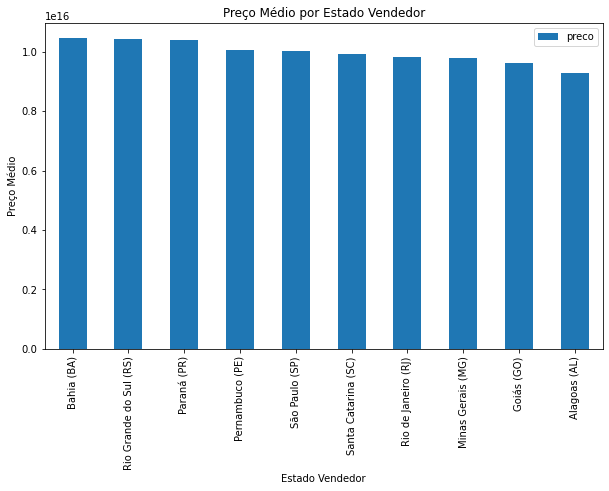

In [25]:
# Calcula a média dos valores de garantia_de_fábrica e preco, agrupados por estado_vendedor,
# e ordena os resultados pelo preço médio em ordem decrescente
df_plot = dftestes[['estado_vendedor', 'garantia_de_fábrica', 'preco']].groupby('estado_vendedor').mean().sort_values('preco', ascending=False)

# Gera o gráfico de barras
df_plot.plot(kind='bar', y='preco', figsize=(10, 6))

# Configurações do gráfico
plt.xlabel('Estado Vendedor')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Estado Vendedor')

# Exibe o gráfico
plt.show()

# Com base nos dados podemos evidenciar que : 
A coluna "garantia_de_fábrica" indica a proporção média de carros com garantia de fábrica para cada estado_vendedor.

Os estados com as maiores proporções médias de carros com garantia de fábrica são Alagoas (AL) e Goiás (GO), com aproximadamente 46,4% e 23,6% dos carros, respectivamente.
Os estados com as menores proporções médias de carros com garantia de fábrica são Pernambuco (PE) e Bahia (BA), com cerca de 6,3% e 8,4% dos carros, respectivamente.
A coluna "preco" indica o preço médio dos carros para cada estado_vendedor.

Os estados com os maiores preços médios de carros são Bahia (BA) e Rio Grande do Sul (RS), com valores aproximados de 1,04x10^16.
Os estados com os menores preços médios de carros são Alagoas (AL) e Goiás (GO), com valores em torno de 9,28x10^15.

As observações nos dão uma ideia inicial sobre as diferenças nas proporções de carros com garantia de fábrica e nos preços médios entre os "estados_vendedores" analisados. No entanto, é importante ressaltar que essas conclusões são baseadas nos dados fornecidos e podem não refletir completamente a realidade do mercado de automóveis.

# Qual Melhor estado para se comprar uma picape com transmissao Automatica ?

In [26]:
train.cambio.value_counts()[0:20]

Automática               22545
Manual                    4989
CVT                       1792
Automatizada               139
Automatizada DCT            53
Semi-automática             41
Automática Sequencial       25
Name: cambio, dtype: int64

In [27]:
picape_aut = train[(train.tipo == 'Picape')& (train.cambio == 'Automática')] [['estado_vendedor','tipo']].groupby('estado_vendedor').count().sort_values('tipo',ascending=False)
picape_aut

,tipo
estado_vendedor,
São Paulo (SP),1712
Paraná (PR),348
Rio de Janeiro (RJ),318
Santa Catarina (SC),283
Minas Gerais (MG),211
Rio Grande do Sul (RS),198
Goiás (GO),102
Bahia (BA),68
Pernambuco (PE),14


<Figure size 864x432 with 0 Axes>

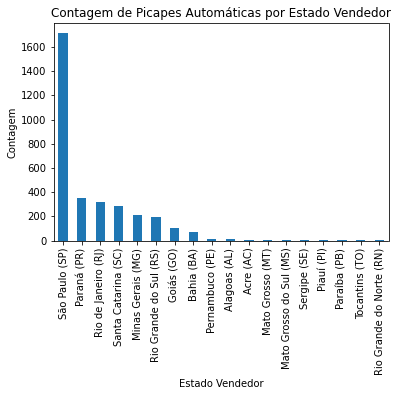

In [28]:
picape_aut = train[(train.tipo == 'Picape') & (train.cambio == 'Automática')][['estado_vendedor', 'tipo']].groupby('estado_vendedor').count().sort_values('tipo', ascending=False)

plt.figure(figsize=(12, 6))
picape_aut.plot(kind='bar', legend=False)
plt.title('Contagem de Picapes Automáticas por Estado Vendedor')
plt.xlabel('Estado Vendedor')
plt.ylabel('Contagem')
plt.show()

In [29]:
# Filtrando os dados para picapes automáticas e agrupando por estado_vendedor, calculando a média do preço e ordenando os valores
picape_auto = train[(train.tipo == 'Picape') & (train.cambio == 'Automática')][['estado_vendedor', 'preco']].groupby('estado_vendedor').mean().sort_values('preco').reset_index()

In [30]:
picape_auto.sort_values('preco')

,estado_vendedor,preco
0,Rio Grande do Norte (RN),1.799617e+15
1,Paraíba (PB),4.777728e+15
2,Mato Grosso do Sul (MS),6.971186e+15
3,Mato Grosso (MT),7.338911e+15
4,Alagoas (AL),8.274542e+15
5,Minas Gerais (MG),9.823477e+15
6,Paraná (PR),1.029761e+16
7,Piauí (PI),1.053212e+16
8,Goiás (GO),1.054876e+16
9,Santa Catarina (SC),1.056219e+16


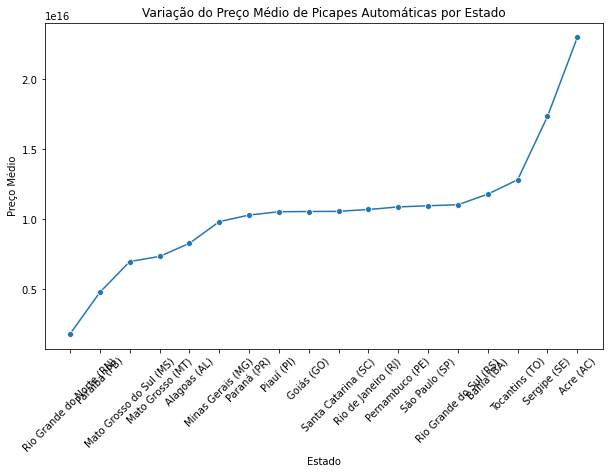

In [31]:
# Gerando um gráfico de linha a partir dos dados filtrados
plt.figure(figsize=(10, 6))
sns.lineplot(x='estado_vendedor', y='preco', data=picape_auto, marker='o')
plt.title('Variação do Preço Médio de Picapes Automáticas por Estado')
plt.xlabel('Estado')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)
plt.show()

 
Com base nos dados fornecidos na tabela, o melhor estado para comprar uma picape automática considerando os valores de preço, pode-se observar que o estado com o menor valor de preço é o Rio Grande do Norte (RN), seguido por Paraíba (PB), Mato Grosso do Sul (MS) e Mato Grosso (MT).

# Qual melhor estado para se comprar carros que ainda estejam dentro da garantia de fabrica ?

In [32]:
garantia_de_fabrica = train

In [33]:
estado_garantia = garantia_de_fabrica[['estado_vendedor','garantia_de_fábrica','preco','revisoes_dentro_agenda']].groupby('estado_vendedor').sum().sort_values('garantia_de_fábrica',ascending=False)[0:5].reset_index()
estado_garantia

C:\Users\marce\AppData\Local\Temp\ipykernel_15964\411532685.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estado_garantia = garantia_de_fabrica[['estado_vendedor','garantia_de_fábrica','preco','revisoes_dentro_agenda']].groupby('estado_vendedor').sum().sort_values('garantia_de_fábrica',ascending=False)[0:5].reset_index()


,estado_vendedor,garantia_de_fábrica,preco
0,São Paulo (SP),2307.0,1.640546e+20
1,Rio de Janeiro (RJ),412.0,2.503207e+19
2,Paraná (PR),389.0,2.624164e+19
3,Santa Catarina (SC),330.0,2.287032e+19
4,Rio Grande do Sul (RS),281.0,1.714449e+19


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


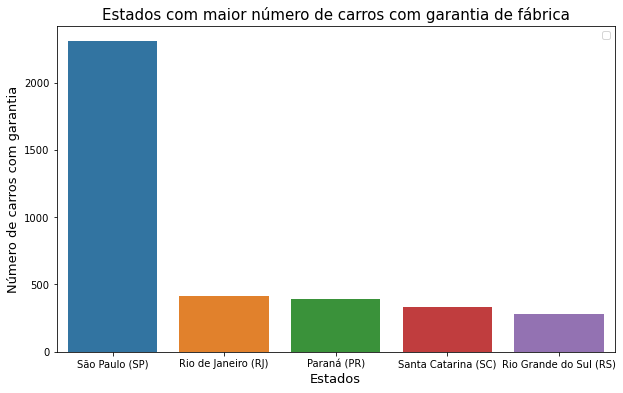

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=estado_garantia, x='estado_vendedor', y='garantia_de_fábrica')
plt.xlabel('Estados', fontsize=13)
plt.ylabel('Número de carros com garantia', fontsize=13)
plt.title('Estados com maior número de carros com garantia de fábrica', fontsize=15)
plt.legend(fontsize=10)
plt.show()

# Dados sobre estado_garantia :

Estado de São Paulo (SP) possui o maior número de carros com garantia de fábrica, totalizando 2.307 veículos.
O estado do Rio de Janeiro (RJ) possui 412 carros com garantia de fábrica.
O estado do Paraná (PR) possui 389 carros com garantia de fábrica.
Santa Catarina (SC) possui 330 carros com garantia de fábrica.
Rio Grande do Sul (RS) possui 281 carros com garantia de fábrica.
Além disso, foram fornecidos os valores de preço para cada estado.

Essa análise permite identificar os estados com maior número de carros com garantia de fábrica e ter uma noção dos preços associados a esses veículos.

#Revisoes Dentro da Agenda 


In [35]:
train.revisoes_dentro_agenda.value_counts().index[0]

'Todas as revisões feitas pela agenda do carro'

In [36]:
train.revisoes_dentro_agenda = train.revisoes_dentro_agenda.replace(train.revisoes_dentro_agenda.value_counts().index[0],1)
train.revisoes_dentro_agenda = train.revisoes_dentro_agenda.fillna(0)

In [37]:
train[(train.garantia_de_fábrica==1)&(train.revisoes_dentro_agenda==1)][['estado_vendedor','garantia_de_fábrica',
                                                                         'revisoes_dentro_agenda','preco']].groupby('estado_vendedor').count().sort_values('garantia_de_fábrica',ascending=False)[0:5].reset_index()


,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,São Paulo (SP),1292,1292,1292
1,Paraná (PR),201,201,201
2,Rio de Janeiro (RJ),198,198,198
3,Santa Catarina (SC),191,191,191
4,Rio Grande do Sul (RS),160,160,160


In [38]:
lista = ['São Paulo (SP)','Paraná (PR)','Rio de Janeiro (RJ)','Santa Catarina (SC)','Rio Grande do Sul (RS)']
garantia_revisao = listaFiltro(train,'estado_vendedor' ,lista)

In [39]:
estado_preco = garantia_revisao[(garantia_revisao.garantia_de_fábrica==1)&(garantia_revisao.revisoes_dentro_agenda==1)][['estado_vendedor','preco']].groupby('estado_vendedor').mean().sort_values('preco',ascending=False).reset_index()
estado_preco

,estado_vendedor,preco
0,Santa Catarina (SC),1.136324e+16
1,Rio Grande do Sul (RS),1.100160e+16
2,Paraná (PR),1.093814e+16
3,Rio de Janeiro (RJ),1.072757e+16
4,São Paulo (SP),9.900599e+15


In [40]:
train[(train.garantia_de_fábrica==1)&(train.revisoes_dentro_agenda==1)][['estado_vendedor','garantia_de_fábrica','revisoes_dentro_agenda','preco']].groupby('estado_vendedor').count().sort_values('garantia_de_fábrica',ascending=False)[0:5].reset_index()


,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,São Paulo (SP),1292,1292,1292
1,Paraná (PR),201,201,201
2,Rio de Janeiro (RJ),198,198,198
3,Santa Catarina (SC),191,191,191
4,Rio Grande do Sul (RS),160,160,160


# Analise sobre garantia de fabrica  x revisoes dentro da agenda  por estado

O estado de Santa Catarina (SC) possui o maior preço médio de veículos entre os estados vendedores, com um valor aproximado de 1.136324e+16.
O estado do Rio Grande do Sul (RS) apresenta o segundo maior preço médio, com um valor próximo a 1.100160e+16.
O estado do Paraná (PR) ocupa a terceira posição em termos de preço médio, com um valor aproximado de 1.093814e+16.
O estado do Rio de Janeiro (RJ) possui um preço médio menor em comparação com os três primeiros estados, com um valor próximo a 1.072757e+16.
O estado de São Paulo (SP) apresenta o menor preço médio entre os estados analisados, com um valor próximo a 9.900599e+15.
Essa análise indica que os estados do Sul do Brasil (Santa Catarina, Rio Grande do Sul e Paraná) possuem os preços médios mais altos em comparação com os estados do Rio de Janeiro e São Paulo.

In [41]:
lista_estados = ['São Paulo (SP)','Paraná (PR)','Rio de Janeiro (RJ)','Santa Catarina (SC)','Rio Grande do Sul (RS)']
garantia_revisao = listaFiltro(train,'estado_vendedor' ,lista_estados)

In [42]:
estado_preco = garantia_revisao[(garantia_revisao.garantia_de_fábrica==1)&(garantia_revisao.revisoes_dentro_agenda==1)][['estado_vendedor','preco']].groupby('estado_vendedor').mean().sort_values('preco',ascending=False).reset_index()
estado_preco

,estado_vendedor,preco
0,Santa Catarina (SC),1.136324e+16
1,Rio Grande do Sul (RS),1.100160e+16
2,Paraná (PR),1.093814e+16
3,Rio de Janeiro (RJ),1.072757e+16
4,São Paulo (SP),9.900599e+15


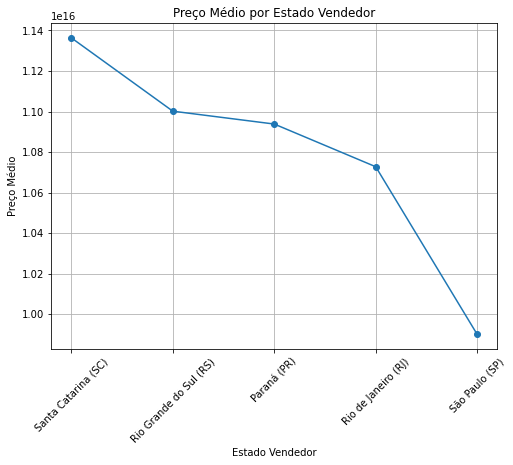

In [43]:
# Configuração do gráfico
plt.figure(figsize=(8, 6))
plt.plot(estado_preco['estado_vendedor'], estado_preco['preco'], marker='o')
plt.xlabel('Estado Vendedor')
plt.ylabel('Preço Médio')
plt.title('Preço Médio por Estado Vendedor')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Estados com os maiores preços médios de venda são:

Santa Catarina (SC) - Preço médio: 1.136324e+16
Rio Grande do Sul (RS) - Preço médio: 1.100160e+16
Paraná (PR) - Preço médio: 1.093814e+16
Rio de Janeiro (RJ) - Preço médio: 1.072757e+16
São Paulo (SP) - Preço médio: 9.900599e+15
Essa análise mostra que esses estados apresentam valores mais altos nos preços médios de venda de veículos com garantia de fábrica e revisões dentro da agenda

# Realizando Previsão de Preço 



In [44]:
train_ = train.drop(['modelo','versao','cidade_vendedor'],axis=1)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca_popular            29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [46]:
train_ = train_.drop('veiculo_alienado',axis=1)

In [47]:
train_.blindado.value_counts()

N    29336
S      248
Name: blindado, dtype: int64

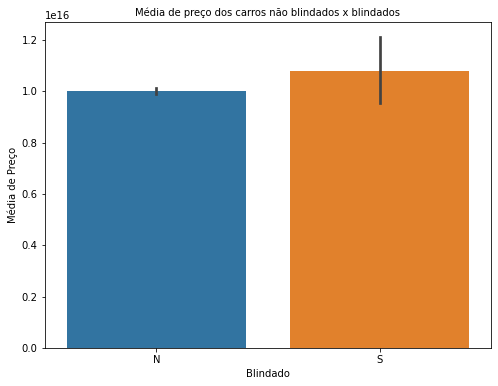

In [48]:
# Plot do gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=train_, x='blindado', y='preco')
# Configurações do gráfico
plt.xlabel('Blindado', fontsize=10)
plt.ylabel('Média de Preço', fontsize=10)
plt.title('Média de preço dos carros não blindados x blindados', fontsize=10)
# Exibir o gráfico
plt.show()

In [49]:
train.blindado = train.blindado.replace('N',0)
train.blindado = train.blindado.replace('S',1)
train.blindado.value_counts()

0    29336
1      248
Name: blindado, dtype: int64

In [50]:
train.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,blindado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0,2.958400e+04
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,0.008383,0.147546,0.199770,NaN,1.002299e+16
std,3.487334,4.062422,2.673930,32561.769309,0.338360,0.091175,0.354655,0.399834,NaN,9.547504e+15
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,0.000000,0.000000,0.000000,NaN,2.006292e+10
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,0.000000,0.000000,0.000000,NaN,3.196583e+15
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,0.000000,0.000000,0.000000,NaN,8.244891e+15
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,0.000000,0.000000,0.000000,NaN,1.342533e+16
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.000000,1.000000,1.000000,NaN,6.549912e+16


In [51]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_fotos,29407.0,1.032383e+01,3.487334e+00,8.000000e+00,8.000000e+00,8.000000e+00,1.400000e+01,2.100000e+01
ano_de_fabricacao,29584.0,2.016759e+03,4.062422e+00,1.985000e+03,2.015000e+03,2.018000e+03,2.019000e+03,2.022000e+03
ano_modelo,29584.0,2.017809e+03,2.673930e+00,1.997000e+03,2.016000e+03,2.018000e+03,2.020000e+03,2.023000e+03
hodometro,29584.0,5.843059e+04,3.256177e+04,1.000000e+02,3.121400e+04,5.743400e+04,8.195350e+04,3.900650e+05
num_portas,29584.0,3.940677e+00,3.383603e-01,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
blindado,29584.0,8.382910e-03,9.117520e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
garantia_de_fábrica,29584.0,1.475460e-01,3.546553e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
revisoes_dentro_agenda,29584.0,1.997701e-01,3.998343e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
veiculo_alienado,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preco,29584.0,1.002299e+16,9.547504e+15,2.006292e+10,3.196583e+15,8.244891e+15,1.342533e+16,6.549912e+16


In [52]:
train_.veiculo_único_dono.value_counts()

Único dono    10423
Name: veiculo_único_dono, dtype: int64

In [53]:
train_.veiculo_único_dono = train_.veiculo_único_dono.replace(train.veiculo_único_dono.value_counts().index[0],1)
train_.veiculo_único_dono = train_.veiculo_único_dono.fillna(0)

In [54]:
train_.veiculo_único_dono.value_counts().sum()

29584

In [55]:
train_.marca_popular = train_.marca_popular.astype(int)

In [56]:
train_.blindado.value_counts()

N    29336
S      248
Name: blindado, dtype: int64

In [57]:
train_.blindado = train_.blindado.replace('N',0)
train_.blindado = train_.blindado.replace('S',1)
train_.blindado.value_counts()

0    29336
1      248
Name: blindado, dtype: int64

In [58]:
train_.revisoes_concessionaria.value_counts()

Todas as revisões feitas pela concessionária    9172
Name: revisoes_concessionaria, dtype: int64

In [59]:
train_.revisoes_concessionaria = train_.revisoes_concessionaria.replace('Todas as revisões feitas pela concessionária',1)
train_.revisoes_concessionaria = train_.revisoes_concessionaria.fillna(0)
train_.revisoes_concessionaria.value_counts()

0.0    20412
1.0     9172
Name: revisoes_concessionaria, dtype: int64

In [60]:
train_.veiculo_licenciado.value_counts()

Licenciado    15906
Name: veiculo_licenciado, dtype: int64

In [61]:
train_.veiculo_licenciado = train_.veiculo_licenciado.replace('Licenciado',1)
train_.veiculo_licenciado = train_.veiculo_licenciado.fillna(0)
train_.veiculo_licenciado.value_counts()

1.0    15906
0.0    13678
Name: veiculo_licenciado, dtype: int64

In [62]:
train_.num_fotos = train_.num_fotos.fillna(train_.num_fotos.value_counts().index[0])

In [63]:
train_.entrega_delivery=train_.entrega_delivery.astype(int)

In [64]:
train_.troca = train_.troca.astype(int)

In [65]:
train_.elegivel_revisao = train_.elegivel_revisao.astype(int)

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca_popular            29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  int64  
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [67]:
regiao = smf.ols('preco ~ marca_popular+tipo+hodometro+veiculo_único_dono',train_).fit()

In [68]:
regiao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preco   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     20.07
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           4.74e-34
Time:                        12:38:05   Log-Likelihood:            -1.1304e+06
No. Observations:               29584   AIC:                         2.261e+06
Df Residuals:                   29574   BIC:                         2.261e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     6.446e+15   1.87e+15      3.451      0.001    2.78e+15    1.01e+16
tipo[T.Hatchback]             4.799e+15   1.88e+15      2.558      0.011    1.12e+15    8.48e+15
tipo[T.Minivan]               9.972e+14   4.06e+15      0.246      0.806   -6.95e+15    8.95e+15
tipo[T.Perua/SW]              6.351e+15   2.62e+15      2.423      0.015    1.21e+15    1.15e+16
tipo[T.Picape]                5.394e+15   1.88e+15      2.876      0.004    1.72e+15    9.07e+15
tipo[T.Sedã]                  4.273e+15   1.87e+15      2.284      0.022    6.06e+14    7.94e+15
tipo[T.Utilitário esportivo]  5.703e+15   1.88e+15      3.041      0.002    2.03e+15    9.38e+15
marca_popular                  -7.6e+14   1.26e+14     -6.037      0.000   -1.01e+15   -5.13e+14
hodometro                    -9.222e+09   1.92e+09     -4.810      0.000    -1.3e+10   -5.46e+09
veiculo_único_dono           -2.756e+14    1.3e+14     -2.123      0.034    -5.3e+14   -2.11e+13
==============================================================================
Omnibus:                    15732.444   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131756.828
Skew:                           2.445   Prob(JB):                         0.00
Kurtosis:                      12.109   Cond. No.                     6.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  regressão linear (OLS) aplicada ao modelo com a variável dependente "preco". 

R-quadrado (R-squared): O valor de 0.006 indica que apenas 0.6% da variabilidade da variável dependente "preco" é explicada pelas variáveis independentes incluídas no modelo.

Intercepto (Intercept): O coeficiente do intercepto é 6.446e+15. Isso significa que, quando todas as variáveis independentes são zero, espera-se que o preço seja de aproximadamente 6.446e+15.

Coeficientes das variáveis independentes: Cada coeficiente representa o efeito estimado das variáveis independentes no preço. Por exemplo, o coeficiente "tipo[T.Hatchback]" de 4.799e+15 indica que, quando o tipo do veículo é "Hatchback", espera-se um aumento de 4.799e+15 no preço, em comparação com o tipo de referência.

Valor p (P>|t|): Os valores p fornecem uma medida da significância estatística dos coeficientes. Valores p menores que 0.05 indicam que os coeficientes são estatisticamente significativos. Por exemplo, o valor p de 0.001 para o intercepto indica que é estatisticamente significativo.

Observações e graus de liberdade: O modelo foi ajustado com base em 29.584 observações e possui 9 graus de liberdade para as variáveis independentes.

Log-Likelihood: O valor negativo indica o log da função de verossimilhança, usado para avaliar a qualidade do ajuste do modelo. Valores mais baixos indicam um melhor ajuste.

AIC e BIC: Esses critérios de informação são utilizados para comparar diferentes modelos. Quanto menor o valor, melhor o ajuste do modelo.

Omnibus, Jarque-Bera e Skewness: Esses testes estatísticos avaliam a normalidade dos resíduos do modelo. Valores de probabilidade (Prob) menores que 0.05 indicam desvio significativo da normalidade.

Durbin-Watson: Este teste avalia a presença de autocorrelação nos resíduos. Um valor próximo de 2 indica ausência de autocorrelação.

Kurtosis: Mede a forma da distribuição dos resíduos. Um valor maior que 3 indica maior concentração nas caudas da distribuição.

Cond. No.: Indica o número de condição, que é uma medida de estabilidade numérica do modelo. Valores maiores indicam maior multicolinearidade entre as variáveis independentes.

Essas análises fornecem insights sobre o ajuste do modelo e a relação das variáveis independentes com o preço

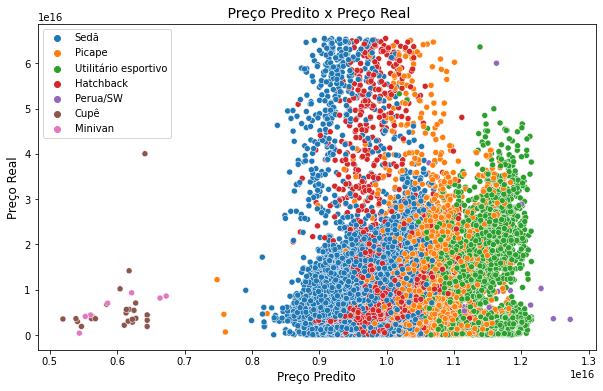

In [69]:
# Cria um dataframe com as variáveis independentes
independent_vars = train_[['marca_popular', 'tipo', 'hodometro', 'veiculo_único_dono']]

# Cria uma nova coluna no dataframe com as predições do modelo
train_['predicted_price'] = regiao.predict(independent_vars)

# Plota o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_, x='predicted_price', y='preco', hue='tipo')
plt.xlabel('Preço Predito', fontsize=12)
plt.ylabel('Preço Real', fontsize=12)
plt.title(' Preço Predito x Preço Real', fontsize=14)
plt.legend(fontsize=10)
plt.show()


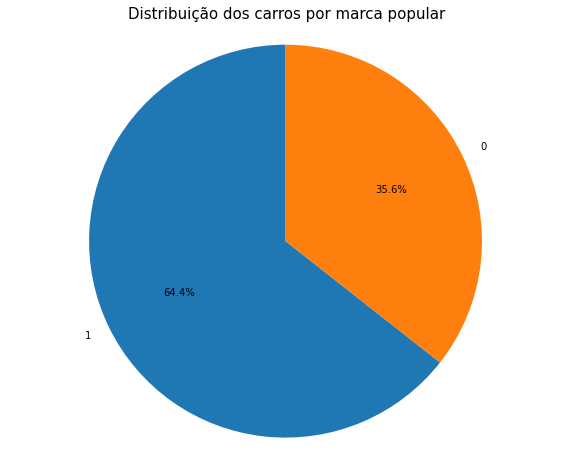

In [70]:
plt.figure(figsize=(10, 8))

labels = train_['marca_popular'].unique()
values = train_['marca_popular'].value_counts()

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuição dos carros por marca popular', fontsize=15)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


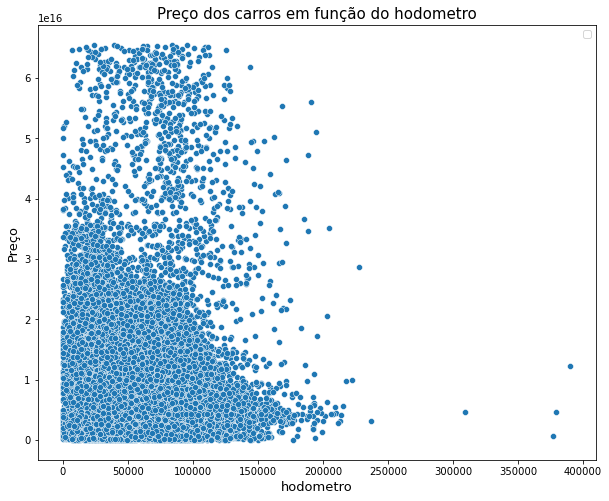

In [71]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_,x='hodometro',y='preco')
plt.xlabel('hodometro', fontsize=13)
plt.ylabel('Preço', fontsize=13)
plt.title('Preço dos carros em função do hodometro', fontsize=15)
plt.legend(fontsize=10)
plt.show()

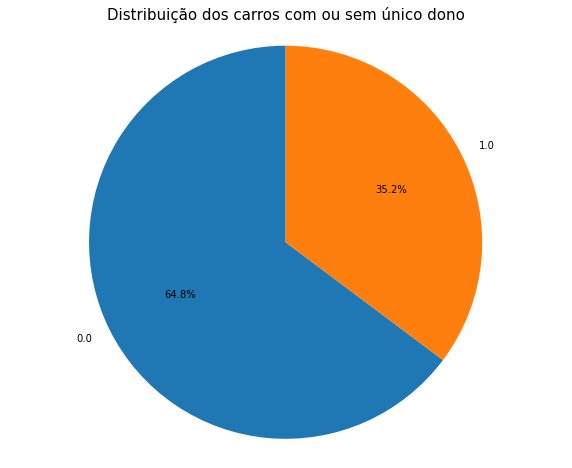

In [72]:
plt.figure(figsize=(10, 8))
labels = train_['veiculo_único_dono'].unique()
values = train_['veiculo_único_dono'].value_counts()
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuição dos carros com ou sem único dono', fontsize=15)
plt.show()


# Transformando e compactando coluna de ID E PRECO 

In [73]:
test = test[['marca','hodometro','veiculo_único_dono']].copy()

In [74]:
test

,marca,hodometro,veiculo_único_dono
0,NISSAN,20258.0,NaN
1,FIAT,53045.0,Único dono
2,AUDI,32486.0,NaN
3,CHEVROLET,24937.0,Único dono
4,FORD,62074.0,NaN
...,...,...,...
9857,TOYOTA,44943.0,NaN
9858,TOYOTA,44316.0,NaN
9859,CHEVROLET,21587.0,Único dono
9860,PEUGEOT,54084.0,Único dono


In [75]:
test.veiculo_único_dono.value_counts()

Único dono    3475
Name: veiculo_único_dono, dtype: int64

In [76]:

test['veiculo_único_dono'] = test['veiculo_único_dono'].replace('Único dono',1)
test['veiculo_único_dono'] = test['veiculo_único_dono'].fillna(0)
test.veiculo_único_dono.value_counts()

0.0    6387
1.0    3475
Name: veiculo_único_dono, dtype: int64

In [77]:
marca_popular = ['VOLKSWAGEN','CHEVROLET','TOYOTA','HYUNDAI','FIAT','PEUGEOT','HONDA','FORD','RENAULT','NISSAN','CITROEN']

In [78]:
for i in range(0,11):
    marca = marca_popular[i]
    test_mask = test.marca==marca
    test['marca'][test_mask] = 1

C:\Users\marce\AppData\Local\Temp\ipykernel_15964\775975499.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['marca'][test_mask] = 1


In [79]:
test.marca.value_counts()

1                6335
JEEP              667
AUDI              593
BMW               591
MERCEDES-BENZ     376
MITSUBISHI        286
LAND ROVER        267
KIA               157
PORSCHE           121
VOLVO              76
JAGUAR             64
CITROËN            54
RAM                53
CHERY              49
TROLLER            46
MINI               45
LEXUS              16
SUBARU             13
SUZUKI             10
CHRYSLER           10
DODGE              10
SSANGYONG           6
MASERATI            5
SMART               4
JAC                 2
LIFAN               2
FERRARI             1
EFFA                1
ALFA ROMEO          1
LAMBORGHINI         1
Name: marca, dtype: int64

In [80]:
marca_nao_popular = test.marca.value_counts().index[1:]
for i in range(0,29):
    marca = marca_nao_popular[i]
    test_mask = test.marca==marca
    test['marca'][test_mask] = 0

C:\Users\marce\AppData\Local\Temp\ipykernel_15964\2395875614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['marca'][test_mask] = 0


In [81]:
test.rename({"marca": "marca_popular"}, axis=1, inplace=True)

In [82]:
test.marca_popular.value_counts()

1    6335
0    3527
Name: marca_popular, dtype: int64

In [83]:
df_final = train[['id','preco']]

In [84]:
df_final.to_csv('predicted.csv',index=False)

In [85]:
testando = pd.read_csv('predicted.csv')